In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('/home/bogdan/prod.csv', delimiter=',')
df['dur'] = df['report.date'] - df['production.date']
H = 'harpy.co'
W = 'westeros.inc'

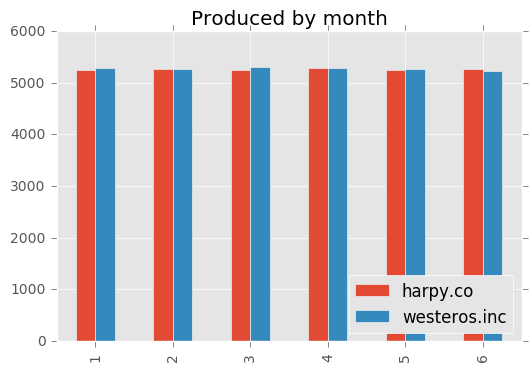

In [87]:
prods = df[df['dur'] == 0]
prod_H = np.array(prods[prods['supplier'] == H].groupby(['production.date'])['produced'].aggregate(sum))
prod_W = np.array(prods[prods['supplier'] == W].groupby(['production.date'])['produced'].aggregate(sum))

a = (np.array([prod_H, prod_W])).transpose()
p = pd.DataFrame(data = a)
p.columns = [H, W]
ax = p.plot(kind = 'bar')
ax.set_xticklabels(range(1, 7))

plt.legend(loc = 4)
plt.title('Produced by month')
plt.show()

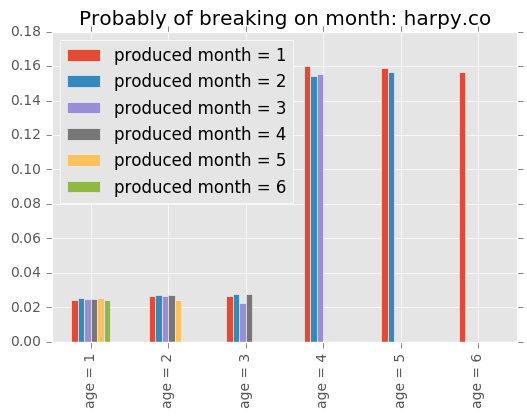

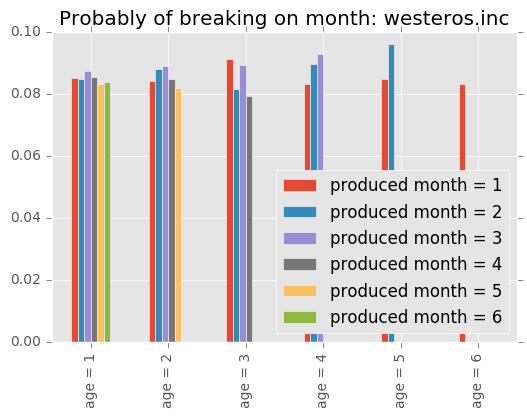

In [129]:
defs_H = []
defs_W = []
probably_of_defs_H = []
probably_of_defs_W = []
defs = df[df['dur'] != 0]
df_H = defs[defs['supplier'] == H]
df_W = defs[defs['supplier'] == W]
for i in range(1, 7):
    x = list(df_H[df_H['production.date'] == i].groupby('dur')['defects'].aggregate(sum))
    defs_H.append(x)
    alive = prod_H[i - 1]
    y = []
    for xx in x:
        y.append(xx / alive)
        alive -= xx
    y += [0] * (i - 1)
    probably_of_defs_H.append(y)
    
    x = list(df_W[df_W['production.date'] == i].groupby('dur')['defects'].aggregate(sum))
    defs_W.append(x)
    alive = prod_W[i - 1]
    y = []
    for xx in x:
        y.append(xx / alive)
        alive -= xx
    y += [0] * (i - 1)
    probably_of_defs_W.append(y)


a = (np.array(probably_of_defs_H)).transpose()
p = pd.DataFrame(data = a)
p.columns = ['produced month = ' + str(i) for i in range(1, 7)]
ax = p.plot(kind = 'bar')
ax.set_xticklabels(['age = ' + str(i) for i in range(1, 7)])

plt.title('Probably of breaking on month: ' + H)
plt.show()


a = (np.array(probably_of_defs_W)).transpose()
p = pd.DataFrame(data = a)
p.columns = ['produced month = ' + str(i) for i in range(1, 7)]
ax = p.plot(kind = 'bar')
ax.set_xticklabels(['age = ' + str(i) for i in range(1, 7)])

plt.legend(loc = 4)
plt.title('Probably of breaking on month: ' + W)
plt.show()

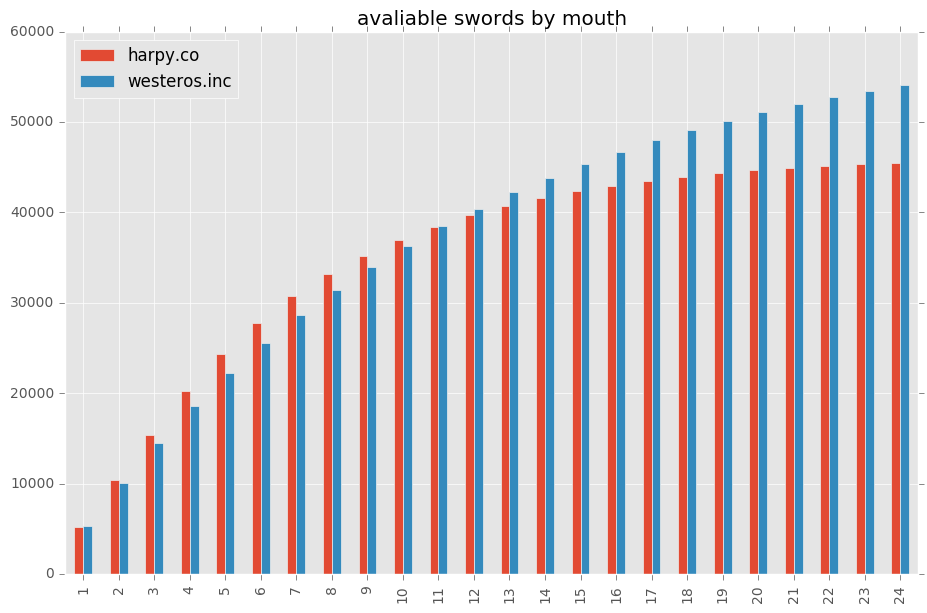

In [169]:
mean_defs_H = [sum([probably_of_defs_H[j][i] for j in range(6)]) / (6 - i) for i in range(6)]
mean_defs_W = [sum([probably_of_defs_W[j][i] for j in range(6)]) / (6 - i) for i in range(6)]
future_defs_H = sum([sum(x[3:]) for x in probably_of_defs_H]) / 6
future_defs_W = sum([sum(x) for x in probably_of_defs_W]) / 21
mean_defs_H.append(future_defs_H)
mean_defs_W.append(future_defs_W)
mean_prod_H = sum(prod_H) / 6
mean_prod_W = sum(prod_W) / 6

alive_H = []
alive_W = []
alive_H_by_mon = [0] * 7
alive_W_by_mon = [0] * 7

for i in range(6):
    alive_H_by_mon[0] = prod_H[i]
    alive_W_by_mon[0] = prod_W[i]
    alive_H.append(sum(alive_H_by_mon))
    alive_W.append(sum(alive_W_by_mon))
    for j in range(i + 1):
        alive_H_by_mon[j] -= defs_H[i - j][j]
        alive_W_by_mon[j] -= defs_W[i - j][j]
        
    for j in range(6, 0, -1):
        alive_H_by_mon[j] = alive_H_by_mon[j - 1]
        alive_W_by_mon[j] = alive_W_by_mon[j - 1]
        
for i in range(18):
    alive_H_by_mon[0] = mean_prod_H
    alive_W_by_mon[0] = mean_prod_W
    alive_H.append(sum(alive_H_by_mon))
    alive_W.append(sum(alive_W_by_mon))
    for j in range(7):
        alive_H_by_mon[j] *= (1 - mean_defs_H[j])
        alive_W_by_mon[j] *= (1 - mean_defs_W[j])
    
    alive_H_by_mon[6] += alive_H_by_mon[5]
    alive_W_by_mon[6] += alive_W_by_mon[5]
    for j in range(5, 0, -1):
        alive_H_by_mon[j] = alive_H_by_mon[j - 1]
        alive_W_by_mon[j] = alive_W_by_mon[j - 1]


a = (np.array([alive_H, alive_W])).transpose()
p = pd.DataFrame(data = a)
p.columns = [H, W]
ax = p.plot(kind = 'bar', figsize = (11, 7))
ax.set_xticklabels(range(1, 25))

plt.title('avaliable swords by mouth')
plt.show()